# ProDS 실기문제 복습

## 문제 6

In [6]:
# =============================================================================
# 구분자 : comma(“,”), 4,323 Rows, 19 Columns, UTF-8 인코딩

# 주택 관련 정보를 바탕으로 주택 가격을 예측해 보고자 한다. 
# 다음은 확보한 주택 관련 데이터로 총 19개 컬럼으로 구성되어
# 있다.

# 컬 럼 / 정 의 / Type
# id / 매물 번호 / Double
# date / 날짜 / String
# price / 거래 가격 / Double
# bedrooms / 방 개수 / Double
# bathrooms / 화장실 개수 (화장실은 있으나 샤워기 없는 경우 0.5로 처리) / Double
# sqft_living / 건축물 면적 / Double
# sqft_lot / 대지 면적 / Double
# floors / 건축물의 층수 / Double
# waterfront / 강변 조망 가능 여부 (0 / 1) / Double
# view / 경관 (나쁨에서 좋음으로 0 ~ 4로 표시) / Double
# condition / 관리 상태 (나쁨에서 좋음으로 1 ~ 5로 표시) / Double
# grade / 등급 (낮음에서 높음으로 1 ~ 13으로 표시) / Double
# sqft_above / 지상 면적 / Double
# sqft_basement / 지하실 면적 / Double
# yr_built / 건축 연도 / Double
# yr_renovated / 개축 연도 / Double
# zipcode / 우편번호 / Double
# sqft_living15 / 15개의 인근 주택의 평균 건물 면적 / Double
# sqft_lot15 / 15개의 인근 주택의 평균 대지 면적 / Double
# =============================================================================

In [7]:
# 패키지 호출
import pandas as pd
import numpy as np

In [8]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/Bootcamp/python/python/ProDs/Dataset/DataSet_06.csv'
data6 = pd.read_csv(csvFile)
data6.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380


In [9]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  sqft_living15  4323 non-null   int64  
 18  sqft_lot

In [10]:
# =============================================================================
# 1.강변 조망이 가능한지 여부(waterfront)에 따라 평균 주택 가격을 계산하고 조망이
# 가능한 경우와 그렇지 않은 경우의 평균 가격 차이의 절대값을 구하시오. 답은
# 소수점 이하는 버리고 정수부만 기술하시오. (답안 예시) 1234567
# =============================================================================

In [11]:
# 강변 조망의 여부에 따라 평균주택 가격 도출
q6_1_0 = data6[data6.waterfront == 0]['price'].mean()
q6_1_1 = data6[data6.waterfront == 1]['price'].mean()

In [12]:
# 평균가격 차이의 절대값
np.trunc(abs(q6_1_0 - q6_1_1))

1167272.0

In [13]:
# =============================================================================
# 2.price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built 등 7개의 변수 간의
# 상관분석을 수행하고 price와의 상관계수의 절대값이 가장 큰 변수와 가장 작은
# 변수를 차례로 기술하시오. (답안 예시) view, zipcode
# 
# =============================================================================

In [14]:
var_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [15]:
# 상관계수
q6_2 = data6[var_list].corr()['price'].drop('price')
q6_2

bedrooms       0.279824
bathrooms      0.534277
sqft_living    0.709157
sqft_lot       0.106341
floors         0.270423
yr_built       0.059895
Name: price, dtype: float64

In [16]:
# price와의 상관계수의 절대값이 가장 큰 변수와 가장 작은 변수
q6_2.abs().idxmax(), q6_2.abs().idxmin()

('sqft_living', 'yr_built')

In [17]:
# =============================================================================
# 3. id, date, 그리고 zipcode를 제외한 모든 변수를 독립변수로, price를 종속변수로 하여
# 회귀분석을 수행하시오. 통계적 유의성을 갖지 못하는 독립변수를 제거하면 회귀
# 모형에 남는 변수는 모두
# 몇 개인가? 이 때 음의 회귀계수를 가지는 변수는 몇 개인가? (답안 예시) 5, 3
# =============================================================================

# =============================================================================
# (참고)
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from statsmodels.formula.api import ols
# =============================================================================

In [18]:
# statsmodel 패키지 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [19]:
var_list = data6.columns.drop(['id', 'date', 'zipcode'])
var_list2 = data6.columns.drop(['id', 'date', 'zipcode', 'price'])

In [20]:
var_list2

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [21]:
'price~' + 'bedrooms+bathrooms'

'price~bedrooms+bathrooms'

In [22]:
# join을 사용하게 되면 var_list2에 있는 변수목록이 문자열 연산을 통해 출력이 된다
'+'.join(var_list2)

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [23]:
form1 = 'price~' + '+'.join(var_list2)
form1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [24]:
# ols메서드를 사용한 회귀분석
lm1 = ols(form1, data6).fit()

In [25]:
# 예측된 price값 출력
lm1.predict(data6)

0       303167.404363
1       494555.779137
2       526394.280931
3       381742.870130
4       326405.856590
            ...      
4318    218820.959470
4319    700129.403303
4320    403050.034203
4321    530431.529542
4322    462692.590490
Length: 4323, dtype: float64

In [26]:
# 회귀분석의 요약정보 확인
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:30:41   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3081      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.11e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
# F통계량의 p-value를 통해 회귀식의 유의성 판단
lm1.f_pvalue < 0.05

True

In [28]:
# 상수 및 회귀계수 호출
lm1.params

Intercept        6.302495e+06
bedrooms        -2.499553e+04
bathrooms        5.179234e+04
sqft_living      9.230807e+01
sqft_lot         5.444844e-03
floors           3.748199e+04
waterfront       6.276528e+05
view             4.039778e+04
condition        1.570573e+04
grade            1.306274e+05
sqft_above       3.373577e+01
sqft_basement    5.857222e+01
yr_built        -3.666896e+03
yr_renovated     1.770319e+01
sqft_living15    2.301144e+01
sqft_lot15      -2.322904e-01
dtype: float64

In [29]:
# 상수 및 회귀계수의 개별 p-value 검정
lm1.pvalues < 0.05

Intercept         True
bedrooms          True
bathrooms         True
sqft_living       True
sqft_lot         False
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above        True
sqft_basement     True
yr_built          True
yr_renovated      True
sqft_living15     True
sqft_lot15       False
dtype: bool

In [30]:
# 유의확률이 0.05보다 작은 회귀계수의 인덱스 도출
# 상수항 제외, 유의미한 변수 추출
sel_var = lm1.pvalues.index[lm1.pvalues < 0.05].drop('Intercept')
sel_var

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15'],
      dtype='object')

In [31]:
# 3번의 답1, 모형에 남는 변수(유의미한 변수의 개수)
len(sel_var)

13

In [32]:
# 3번의 답2, 음수인 회귀계수의 개수
(lm1.params[sel_var] < 0).sum()

2

### 이상치 확인

In [33]:
# 이상치 체크
# bonf(p)이용
# 귀무가설: 이상치가 아니다 vs 대립가설: 이상치이다
data6[lm1.outlier_test()['bonf(p)'] < 0.05]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
163,7768700300,20141205T000000,2575000.0,4,4.25,5540,15408,2.0,0,1,3,11,4280,1260,2006,0,98004,3570,14750
187,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700
248,2424049029,20140529T000000,3100000.0,6,4.25,6980,15682,3.0,0,4,4,12,5330,1650,1999,0,98040,3930,18367
265,1954700410,20140801T000000,2546000.0,4,3.00,4190,8805,2.5,0,2,5,9,3490,700,1928,0,98112,3780,8558
382,1118000320,20150508T000000,3400000.0,4,4.00,4260,11765,2.0,0,0,3,11,3280,980,1939,2010,98112,4260,10408
530,4386700135,20141114T000000,2250000.0,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,2950,9323
863,3625049042,20141011T000000,3635000.0,5,6.00,5490,19897,2.0,0,0,3,12,5490,0,2005,0,98039,2910,17600
1065,9808100150,20150402T000000,3345000.0,5,3.75,5350,15360,1.0,0,1,3,11,3040,2310,2008,0,98004,3740,15940
1067,3025300095,20141009T000000,2500000.0,4,4.50,4300,19844,2.0,0,0,3,11,4300,0,1985,1999,98039,3070,19845
1091,7524900003,20141210T000000,3278000.0,2,1.75,6840,10000,2.5,1,4,3,11,4350,2490,2001,0,98008,3120,12300


In [34]:
# 이상치 제외한 데이터
q6_3 = data6[lm1.outlier_test()['bonf(p)'] >= 0.05]
q6_3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,7663700531,20150106T000000,325000.0,2,1.00,620,14823,1.0,0,0,3,6,620,0,1926,0,98125,1400,7930
4319,7399200770,20141209T000000,417400.0,3,3.00,2680,12285,1.0,0,0,4,8,2680,0,1970,0,98055,2610,9558
4320,1324300126,20150313T000000,415000.0,2,2.50,1160,1219,3.0,0,0,3,8,1160,0,2007,0,98107,1320,2800
4321,8562750250,20140704T000000,600000.0,3,2.50,2320,7609,2.0,0,0,3,8,2320,0,2003,0,98027,2590,4000


D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


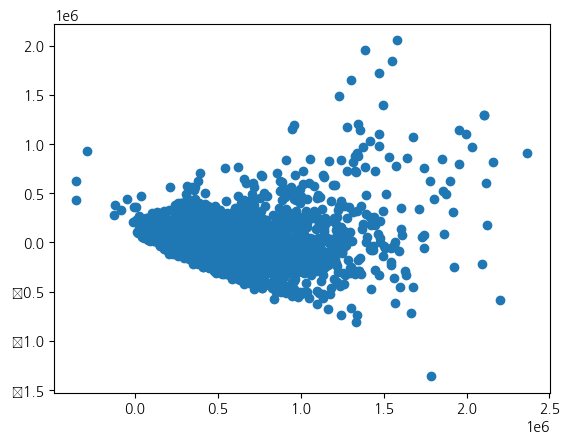

In [35]:
# 산점도를 이용해서 잔차 분포확인
import matplotlib.pyplot as plt

plt.scatter(lm1.fittedvalues, lm1.resid)

### 이상치를 제거한 후 모델링 진행

In [36]:
# 이상치를 제거한 데이터로 모델링 진행 (q6_3데이터 이용)
lm2 = ols(form1, q6_3).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     694.9
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:31:11   Log-Likelihood:                -57946.
No. Observations:                4297   AIC:                         1.159e+05
Df Residuals:                    4282   BIC:                         1.160e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.094e+06   2.54e+05     23.946      0.000    5.59e+06    6.59e+06
bedrooms      -2.871e+04   3772.256     -7.611      0.000   -3.61e+04   -2.13e+04
bathrooms      5.103e+04   6289.879      8.113      0.000    3.87e+04    6.34e+04
sqft_living      77.2816      4.537     17.032      0.000      68.386      86.177
sqft_lot          0.0788      0.080      0.989      0.322      -0.077       0.235
floors         4.145e+04   7037.582      5.890      0.000    2.77e+04    5.53e+04
waterfront     5.049e+05   3.65e+04     13.826      0.000    4.33e+05    5.77e+05
view           3.741e+04   4151.110      9.012      0.000    2.93e+04    4.55e+04
condition      1.625e+04   4576.747      3.551      0.000    7277.107    2.52e+04
grade           1.23e+05   4061.657     30.292      0.000    1.15e+05    1.31e+05
sqft_above       26.5380      4.328      6.132      0.000      18.053      35.022
sqft_basement    50.7438      5.124      9.903      0.000      40.698      60.789
yr_built      -3519.5120    130.253    -27.021      0.000   -3774.875   -3264.149
yr_renovated     21.1753      7.162      2.956      0.003       7.133      35.217
sqft_living15    33.9867      6.531      5.204      0.000      21.182      46.792
sqft_lot15       -0.1971      0.122     -1.617      0.106      -0.436       0.042
==============================================================================
Omnibus:                      946.037   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3975.491
Skew:                           1.021   Prob(JB):                         0.00
Kurtosis:                       7.247   Cond. No.                     1.64e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.04e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


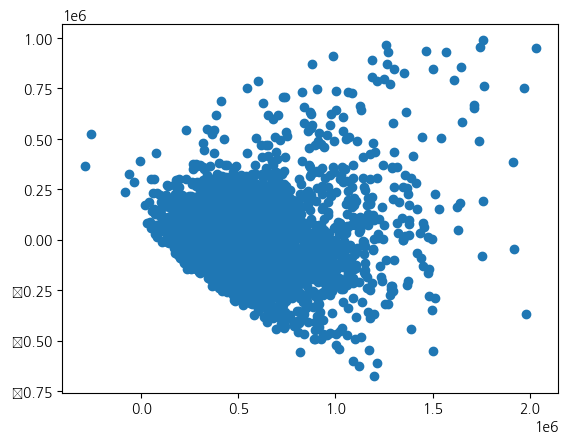

In [37]:
# 산점도 확인
plt.scatter(lm2.fittedvalues, lm2.resid)

In [38]:
# 유의미한 변수로 다시 모델링
form2='price~' + '+'.join(sel_var)

In [39]:
lm3 = ols(form2, q6_3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     810.4
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:31:11   Log-Likelihood:                -57947.
No. Observations:                4297   AIC:                         1.159e+05
Df Residuals:                    4284   BIC:                         1.160e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.113e+06   2.54e+05     24.044      0.000    5.61e+06    6.61e+06
bedrooms      -2.819e+04   3745.030     -7.526      0.000   -3.55e+04   -2.08e+04
bathrooms      5.118e+04   6289.730      8.137      0.000    3.89e+04    6.35e+04
sqft_living      76.5826      4.489     17.059      0.000      67.781      85.384
floors          4.24e+04   6995.217      6.061      0.000    2.87e+04    5.61e+04
waterfront     5.047e+05   3.65e+04     13.822      0.000    4.33e+05    5.76e+05
view           3.744e+04   4149.922      9.021      0.000    2.93e+04    4.56e+04
condition      1.623e+04   4576.828      3.545      0.000    7253.462    2.52e+04
grade          1.234e+05   4055.499     30.430      0.000    1.15e+05    1.31e+05
sqft_above       25.7731      4.242      6.076      0.000      17.457      34.089
sqft_basement    50.8094      5.120      9.924      0.000      40.772      60.847
yr_built      -3531.3371    130.060    -27.152      0.000   -3786.322   -3276.353
yr_renovated     21.0744      7.163      2.942      0.003       7.032      35.117
sqft_living15    33.6406      6.517      5.162      0.000      20.863      46.418
==============================================================================
Omnibus:                      948.603   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3990.627
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     1.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# 모델1,2,3의 pred 비교
lm1_pred = lm1.predict(q6_3)
lm2_pred = lm2.predict(q6_3)
lm3_pred = lm3.predict(q6_3)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 각 모델들의 MAE
lm1_mae = mean_absolute_error(q6_3.price, lm1_pred)
lm2_mae = mean_absolute_error(q6_3.price, lm2_pred)
lm3_mae = mean_absolute_error(q6_3.price, lm3_pred)

In [42]:
# MAR값 비교
lm1_mae, lm2_mae, lm3_mae

(128760.28240440151, 125054.45674041584, 125103.35713732374)

## 문제 2

In [43]:
# =============================================================================
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
# 
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

In [44]:
# 패키지 호출
import pandas as pd
import numpy as np

In [45]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/Bootcamp/python/python/ProDs/Dataset/DataSet_02.csv'
data2 = pd.read_csv(csvFile)
data2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [47]:
data2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [48]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [49]:
# 성별, 혈압, 콜레스테롤의 비율 구하기
q2_1 = data2[['Sex', 'BP', 'Cholesterol']].value_counts(normalize = True)
q2_1

Sex  BP      Cholesterol
F    HIGH    NORMAL         0.105
M    HIGH    NORMAL         0.105
     LOW     NORMAL         0.095
     NORMAL  HIGH           0.095
F    NORMAL  HIGH           0.090
M    HIGH    HIGH           0.090
F    HIGH    HIGH           0.085
M    LOW     HIGH           0.085
F    LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  NORMAL         0.060
M    NORMAL  NORMAL         0.050
dtype: float64

In [50]:
# 시리즈타입 확인
type(q2_1)

pandas.core.series.Series

In [51]:
q2_1.index

MultiIndex([('F',   'HIGH', 'NORMAL'),
            ('M',   'HIGH', 'NORMAL'),
            ('M',    'LOW', 'NORMAL'),
            ('M', 'NORMAL',   'HIGH'),
            ('F', 'NORMAL',   'HIGH'),
            ('M',   'HIGH',   'HIGH'),
            ('F',   'HIGH',   'HIGH'),
            ('M',    'LOW',   'HIGH'),
            ('F',    'LOW',   'HIGH'),
            ('F',    'LOW', 'NORMAL'),
            ('F', 'NORMAL', 'NORMAL'),
            ('M', 'NORMAL', 'NORMAL')],
           names=['Sex', 'BP', 'Cholesterol'])

In [52]:
# 멀티인덱스를 이용하여 답 구하기
q2_1[('F', 'HIGH', 'NORMAL')]

0.105

In [53]:
# 참고
# 인덱스 제거, BP컬럼이 없어진 것을 볼 수 있다
# inplace=True -> 제거 내용이 저장됨
q2_1.droplevel(1)

Sex  Cholesterol
F    NORMAL         0.105
M    NORMAL         0.105
     NORMAL         0.095
     HIGH           0.095
F    HIGH           0.090
M    HIGH           0.090
F    HIGH           0.085
M    HIGH           0.085
F    HIGH           0.070
     NORMAL         0.070
     NORMAL         0.060
M    NORMAL         0.050
dtype: float64

In [54]:
# 인덱스 번호 재설정
# 변경 내용 저장 -> inplace=True 사용
q2_1.reset_index(drop = True)

0     0.105
1     0.105
2     0.095
3     0.095
4     0.090
5     0.090
6     0.085
7     0.085
8     0.070
9     0.070
10    0.060
11    0.050
dtype: float64

In [55]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================

In [56]:
# Age_gr컬럼 만들기
# data2의 데이터 복사
q2_2 = data2.copy()

In [57]:
# 조건

# 조건에 해당하는 위치번호 리턴
# np.where(조건)

# 조건에 따라 분기해서 처리 후 결합해서 데이터셋 리턴
# np.where(조건, 참인 경우 실행문, 거짓인 경우 실행문)

In [58]:
q2_2['Age_gr'] = np.where(q2_2.Age < 20, 10,
                          np.where(q2_2.Age < 30, 20,
                                np.where(q2_2.Age < 40, 30,
                                    np.where(q2_2.Age < 50, 40,
                                        np.where(q2_2.Age < 60, 50, 60)))))

In [59]:
# 결측치데이터를 처리하고 범주화를 실시하기
q2_2['Age_gr'] = np.where(q2_2.Age.isna(), q2_2.Age,
                    np.where(q2_2.Age < 20, 10,
                        np.where(q2_2.Age < 30, 20,
                            np.where(q2_2.Age < 40, 30,
                                np.where(q2_2.Age < 50, 40,
                                    np.where(q2_2.Age < 60, 50, 60))))))

In [60]:
# Na_K_gr 컬럼 만들기
q2_2['Na_K_gr'] = np.where(q2_2.Na_to_K <= 10, 'Lv1',
                    np.where(q2_2.Na_to_K <= 20, 'Lv2',
                        np.where(q2_2.Na_to_K <= 30, 'Lv3','Lv4')))

In [61]:
# Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정 수행
# 두 변수끼리 빈도 작성 -> 작성된 빈도를 입력으로 카이제곱 검정 수행

# Sex와 Drug 교차표
tab = pd.crosstab(index = q2_2['Sex'], columns = q2_2['Drug'])
tab

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


In [62]:
# 카이제곱 검정
from scipy.stats import chi2_contingency
chi2_contingency(tab)

Chi2ContingencyResult(statistic=2.119248418109203, pvalue=0.7138369773987128, dof=4, expected_freq=array([[43.68, 11.04,  7.68,  7.68, 25.92],
       [47.32, 11.96,  8.32,  8.32, 28.08]]))

In [63]:
for_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

In [64]:
q2_2_sel_var = []
for i in for_list:
    tab = pd.crosstab(index = q2_2[i], columns = q2_2['Drug'])
    chi_out = chi2_contingency(tab)
    pvalue = chi_out[1]
    q2_2_sel_var.append([i, pvalue])

In [65]:
q2_2_sel_var

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [66]:
# H0: 독립이다
# H1: 독립이 아니다(연고나성이 있다)
q2_2_sel_var = pd.DataFrame(q2_2_sel_var, columns = ['var', 'pvalue'])
q2_2_sel_var

,var,pvalue
0,Sex,7.138370e-01
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [67]:
# Drug 타입과 연관성이 있는 변수
q2_2_out = q2_2_sel_var.loc[q2_2_sel_var.pvalue < 0.05]
q2_2_out

,var,pvalue
1,BP,5.041733e-27
2,Cholesterol,5.962588e-04
3,Age_gr,7.010113e-04
4,Na_K_gr,1.125464e-14


In [68]:
# 연관성 있는 변수의 개수
len(q2_2_out)

4

In [69]:
# 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯번째 자리까지 기술
np.trunc(q2_2_out['pvalue'].max() * 100000) / 100000

0.0007

In [70]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오. 
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
# 12.345
# =============================================================================

In [71]:
# 데이터 복제
q2_3 = data2.copy()

In [72]:
# 변수변환
q2_3['Sex_cd'] = np.where(q2_3.Sex == 'M', 0, 1)
q2_3['BP_cd'] = np.where(q2_3.BP == 'LOW', 0, np.where(q2_3.BP == 'NORMAL', 1, 2))
q2_3['Ch_cd'] = np.where(q2_3.Cholesterol == 'NORMAL', 0, 1)

In [73]:
# 변환 확인
q2_3['Sex_cd'].value_counts()

0    104
1     96
Name: Sex_cd, dtype: int64

In [74]:
q2_3_var_list = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [75]:
# 의사결정나무 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [76]:
# 의사결정트리 모델링
dt = DecisionTreeClassifier().fit(q2_3[q2_3_var_list], q2_3['Drug'])

In [77]:
dt.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [78]:
import matplotlib.pyplot as plt

[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(0.5555555555555556, 0.7, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugX'),
 Text(0.3333333333333333, 0.5, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugX'),
 Text(0.2222222222222222, 0.3, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugX'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugX'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugC'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugX'),
 Text(0.7777777777777778, 0.5, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugA'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drug

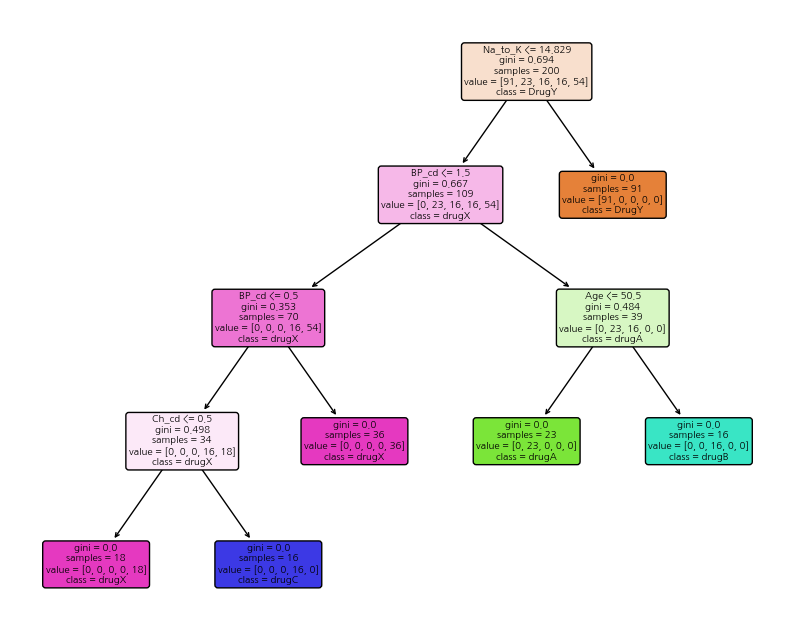

In [79]:
# 트리맵 시각화
plt.figure(figsize = (10, 8))

plot_tree(dt, feature_names = q2_3_var_list, class_names = dt.classes_, filled = True, precision = 3, rounded = True,
         fontsize = 7)

In [80]:
# dt모델에서 변수들의 중요도
q2_3_imp = pd.Series(dt.feature_importances_, index = q2_3_var_list)
q2_3_imp

Age        0.135954
Na_to_K    0.476282
Sex_cd     0.000000
BP_cd      0.265718
Ch_cd      0.122046
dtype: float64

In [81]:
# 오름차순 정렬
q2_3_imp2 = q2_3_imp.sort_values(ascending = False)
q2_3_imp2

Na_to_K    0.476282
BP_cd      0.265718
Age        0.135954
Ch_cd      0.122046
Sex_cd     0.000000
dtype: float64

In [82]:
# 중요변수비율의 누적합
q2_3_imp2.cumsum() < 0.90

Na_to_K     True
BP_cd       True
Age         True
Ch_cd      False
Sex_cd     False
dtype: bool

In [83]:
# 누적합 조건에 맞는 변수이름 출력
q2_3_imp2.index[q2_3_imp2.cumsum() < 0.90]

Index(['Na_to_K', 'BP_cd', 'Age'], dtype='object')

In [84]:
# Root Node의 split feature와 split value
# export_text: 트리맵을 텍스트화로 나타내준다
print(export_text(dt, feature_names = q2_3_var_list, decimals = 3))

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



* 답안 작성 시, Na_to_K, 14.829 와 같이 입력하면 된다.

## 문제 3

In [85]:
# =============================================================================
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

In [86]:
# 패키지 호출
import pandas as pd
import numpy as np

In [87]:
csvFile = 'C:/Users/chunc/Desktop/Bootcamp/python/python/ProDs/Dataset/DataSet_03.csv'
data3 = pd.read_csv(csvFile)
data3.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [88]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [89]:
data3.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [90]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================


In [91]:
# 데이터 복제
q3_1 = data3.copy()

In [92]:
# 비율 변수 생성
q3_1['forehead_ratio'] = q3_1['forehead_width_cm'] / q3_1['forehead_height_cm']

In [93]:
# 평균
xbar = q3_1['forehead_ratio'].mean()
xbar

2.233618718921451

In [94]:
# 표준편차
ss = q3_1['forehead_ratio'].std()
ss

0.26452529699735255

In [95]:
# 이상치 정의
UB = xbar + (3 * ss)
LB = xbar - (3 * ss)

In [96]:
# 이상치 유무확인
(q3_1['forehead_ratio'] > UB) | (q3_1['forehead_ratio'] < LB)

0       False
1       False
2       False
3       False
4       False
        ...  
4996    False
4997    False
4998    False
4999    False
5000    False
Name: forehead_ratio, Length: 5001, dtype: bool

In [97]:
# 이상치에 해당하는 데이터 개수
((q3_1['forehead_ratio'] > UB) | (q3_1['forehead_ratio'] < LB)).sum()

3

In [98]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

In [99]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, bartlett, levene
# ttest_1samp: 일표본 t검정
# ttest_in: 독립인 이표본 t검정
# ttest_rel: 대응인 이표본 t검정
# bartlett, levene: 등분산 검정

In [100]:
g_m = q3_1[q3_1.gender == 'Male']['forehead_ratio']
g_f = q3_1[q3_1.gender == 'Female']['forehead_ratio']

In [101]:
# 등분산 검정
bar_out = bartlett(g_m, g_f)
bar_out

BartlettResult(statistic=213.42228096491922, pvalue=2.4617792693952707e-48)

In [102]:
# H0: 등분산 이다 vs H1: 이분산이다
bar_out.pvalue

2.4617792693952707e-48

In [103]:
# 독립인 이표본 t검정
ttest_out = ttest_ind(g_m, g_f, equal_var = False)
ttest_out

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [104]:
# 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림
round(abs(ttest_out.statistic), 3)

2.999

In [105]:
# 가설검증
ttest_out.pvalue < 0.01

True

* 검정통계량 2.999, 귀무가설 기각, 이분산이다. Y

In [106]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다. 
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
# 0.12
# 
# 
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

In [107]:
# 데이터를 7대 3으로 나누어 각각 Train과 Test set로 분할
from sklearn.model_selection import train_test_split

train, test=train_test_split(data3, test_size = 0.3, random_state = 123)

In [108]:
# 2. 입력 변수 선정
var_list = train.columns.drop('gender')

In [109]:
# 3. Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다. 
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report

In [110]:
logit = LogisticRegression().fit(train[var_list], train['gender'])
pred_class = logit.predict(test[var_list])
pred_pr = logit.predict_proba(test[var_list])

In [111]:
# 임계값이 0.8인 경우
pred_class2 = np.where(pred_pr[:,1] >= 0.8, 'Male', 'Female')
round(precision_score(test['gender'], pred_class, pos_label = 'Male'), 2)

0.96

In [112]:
print(classification_report(test['gender'], pred_class))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

